<a href="https://colab.research.google.com/github/joshtburdick/misc/blob/master/plog/FermatFactoringVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A variation on Fermat's factoring method

This is a variation on [Fermat's factoring method](https://en.wikipedia.org/wiki/Fermat%27s_factorization_method),
which tries to write a number $N$ as a difference of squares $N = a^2 - b^2$.

However, here, rather than requiring this to be exact, we only require to be true modulo a product of small primes $m = \prod p_i$.
It's not obvious that trying to solve these separately makes for an easier problem.

Here, we *only* ask ask the question:

For a given set of small primes $p_i$, suppose we wish to factor $N$ (which is less than $m = \prod p_i$). Suppose we find $a$ and $b$ such that, for all $i$,

$a^2 - b^2 \equiv N   ({\rm mod} p_i)$

How often is it the case that any of $a+b$, $a-b$, or $b-a$ shares a
common factor (other than 1) with $N$?

(As a quick check, pasting that into "Generate"; here's what I get.)




In [52]:
# prompt: This is a variation on Fermat's factoring method. It tries to write a number  𝑁  as a difference of squares  𝑁=𝑎2−𝑏2 .
# However, here, rather than requiring this to be exact, we only require to be true modulo a product of small primes  𝑚=∏𝑝𝑖 . It's not obvious that trying to solve these separately makes for an easier problem.
# Here, we only ask ask the question:
# For a given set of small primes  𝑝𝑖 , suppose we wish to factor  𝑁  (which is less than  𝑚=∏𝑝𝑖 ). Suppose we find  𝑎  and  𝑏  such that, for all  𝑖 ,
# 𝑎2−𝑏2≅𝑁(mod𝑝𝑖)
# How often is it the case that any of  𝑎+𝑏 ,  𝑎−𝑏 , or  𝑏−𝑎  shares a common factor (other than 1) with  𝑁 ?

def has_common_factor(N, a, b):
  """Checks if a+b, a-b, or b-a share a common factor with N.

  Args:
    N: The number to factor.
    a: One of the integers in the difference of squares.
    b: The other integer in the difference of squares.

  Returns:
    True if there is a common factor, False otherwise.
  """
  import math

  if math.gcd(abs(a + b), N) > 1:
    return True
  if math.gcd(abs(a - b), N) > 1:
    return True
  if math.gcd(abs(b - a), N) > 1:
    return True
  return False

In [53]:
import math
import random

import itertools
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas

In [54]:
# prompt: Get the first few hundred prime numbers. Feel free to use whatever Python libraries simplify this.

!pip install sympy

from sympy import primerange

primes = list(primerange(2, 1230)) # Get primes up to roughly the first 2000, as the 200th prime is 1223.
primes

# how many primes is this?
len(primes)
# ...close enough

201

## Revised attempt at this
We try to compute the possible values of `a` and `b` faster, using a table.

First, for a given set of primes, we make a table of the
difference of squares, and the various differences between `a` and `b`.

In [55]:
def diff_of_squares_table(primes):
  """Constructs tables of difference of squares.
  Args:
    primes: A list of prime numbers.
  Returns:
    An array with columns:
      0: a^2 - b^2
      1: a + b
      2: a - b
      3: b - a
      4: -a - b
  """
  m = math.prod(primes)
  # First, compute a and b, as square tables containing just 0..(m-1),
  # either on rows or columns. (We then just flatten them to vectors.)
  i = np.arange(m)
  a = i.reshape([m,-1])
  b = i.reshape([-1,m])
  return np.stack([
      a**2 - b**2,
      a+b, a-b, b-a, -a-b
  ], axis=0).reshape([5,-1]).T % m

x = diff_of_squares_table([3,5])
x[:,0]

array([ 0, 14, 11,  6, 14,  5,  9, 11, 11,  9,  5, 14,  6, 11, 14,  1,  0,
       12,  7,  0,  6, 10, 12, 12, 10,  6,  0,  7, 12,  0,  4,  3,  0, 10,
        3,  9, 13,  0,  0, 13,  9,  3, 10,  0,  3,  9,  8,  5,  0,  8, 14,
        3,  5,  5,  3, 14,  8,  0,  5,  8,  1,  0, 12,  7,  0,  6, 10, 12,
       12, 10,  6,  0,  7, 12,  0, 10,  9,  6,  1,  9,  0,  4,  6,  6,  4,
        0,  9,  1,  6,  9,  6,  5,  2, 12,  5, 11,  0,  2,  2,  0, 11,  5,
       12,  2,  5,  4,  3,  0, 10,  3,  9, 13,  0,  0, 13,  9,  3, 10,  0,
        3,  4,  3,  0, 10,  3,  9, 13,  0,  0, 13,  9,  3, 10,  0,  3,  6,
        5,  2, 12,  5, 11,  0,  2,  2,  0, 11,  5, 12,  2,  5, 10,  9,  6,
        1,  9,  0,  4,  6,  6,  4,  0,  9,  1,  6,  9,  1,  0, 12,  7,  0,
        6, 10, 12, 12, 10,  6,  0,  7, 12,  0,  9,  8,  5,  0,  8, 14,  3,
        5,  5,  3, 14,  8,  0,  5,  8,  4,  3,  0, 10,  3,  9, 13,  0,  0,
       13,  9,  3, 10,  0,  3,  1,  0, 12,  7,  0,  6, 10, 12, 12, 10,  6,
        0,  7, 12,  0])

In [56]:
primes = [3,5,7,11]
s = diff_of_squares_table(primes)
print(s.shape)
s

(1334025, 5)


array([[   0,    0,    0,    0,    0],
       [1154,    1, 1154,    1, 1154],
       [1151,    2, 1153,    2, 1153],
       ...,
       [1147, 1151,    2, 1153,    4],
       [1152, 1152,    1, 1154,    3],
       [   0, 1153,    0,    0,    2]])

In [57]:
print(13*17)
r = s[ s[:,0]==13*17 , : ]
print(r.shape)
print(r)

221
(480, 5)
[[221 289 884 271 866]
 [221 499 674 481 656]
 [221 674 499 656 481]
 ...
 [221 481 656 499 674]
 [221 656 481 674 499]
 [221 866 271 884 289]]


In [58]:
# prompt: given a numpy array a and an integer n, compute the GCD of everything in it with n

import numpy as np
def array_gcd(a, n):
  """Computes the GCD of each element in a NumPy array with an integer n.

  Args:
    a: A NumPy array of integers.
    n: An integer.

  Returns:
    A NumPy array of the same shape as a, where each element is the GCD of the
    corresponding element in a and n.
  """
  return np.gcd(a, n)

# Example usage:
# a = np.array([12, 18, 24])
# n = 6
# result = array_gcd(a, n)
# print(result) # Output: [6 6 6]

(This works, but since we know the actual factors, we can do this more simply.)

In [59]:
x = (r % 13 > 0) ^ (r % 17 > 0)
sum(x)

array([ 0, 59, 59, 59, 59])

The first column makes sense. I'm not sure why the others are the same...

In [60]:
x1 = np.sum(x[:,1:5], axis=1)
print(x1.shape)
np.unique(x1, return_counts=True)

(480,)


(array([0, 1, 2]), array([284, 156,  40]))

In [61]:
2*4*6*10

480

In [62]:
13*17

221

In [63]:
# prompt: Given a list of primes whose product is m, get the numbers in 1..m which are members of the multiplicative group.

def multiplicative_group_members(primes):
  """Gets the numbers in 1..m which are members of the multiplicative group.

  Args:
    primes: A list of prime numbers.

  Returns:
    A list of numbers in 1..m that are members of the multiplicative group,
    where m is the product of the primes.
  """
  m = math.prod(primes)
  members = []
  for num in range(1, m + 1):
    is_member = True
    for p in primes:
      if math.gcd(num, p) != 1:
        is_member = False
        break
    if is_member:
      members.append(num)
  return members

# Example usage:
# m_members = multiplicative_group_members(primes)
# print(m_members)

## 2nd(ish) try: using more variations on $a+b$ and $a-b$

Previously, we basically tried adding together every possibility of $\pm a + \pm b$. However, it seems sort of like, if we consider $a \equiv a_i \mathrm{mod} p_i$, then note that $(+a_i)^2 \equiv (-a_i)^2 \mathrm{mod} p_i$. So we should be able to "flip" any "component" $a_i$ or $b_i$, and still have a solution to $N = a^2 - b^2$.

Also note that $-a \equiv -a_i \mathrm{mod} p_i$, and so is like "flipping" all of the components. (In other words, this should also include all of $a+b$, $a-b$, and $b-a$.)

The question is, how many of these (if any) numbers have a nontrivial shared factor with $N$? To answer this, we modify the previous table a bit:


In [64]:
def mod_table(primes):
  """Constructs a table of what the numbers are modulo the primes.
  Args:
    primes: A list of prime numbers.
  Returns:
    An array with, for row i, the value of i mod each of the primes.
  """
  m = math.prod(primes)
  i = np.arange(m)
  return i.reshape([m,-1]) % primes

mod_table([5,7]).T

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
        1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]])

We could use the extended Euclid's method to do this, but instead just construct a table.

In [65]:
import math
import numpy as np
def mod_table(primes):
  """Given an array of primes, constructs an array containing the number
    in [0, primes) congruent to the indices (mod the primes).
  Args:
    primes: An array of prime numbers.
  Returns:
    An array with a dimension for each of the primes.
  """
  a = np.zeros(primes, dtype=np.int64)
  for i in range(math.prod(primes)):
    a[tuple(i%primes)] = i
  return a

mod_table(np.array([3,5,7]))

array([[[  0,  15,  30,  45,  60,  75,  90],
        [ 21,  36,  51,  66,  81,  96,   6],
        [ 42,  57,  72,  87, 102,  12,  27],
        [ 63,  78,  93,   3,  18,  33,  48],
        [ 84,  99,   9,  24,  39,  54,  69]],

       [[ 70,  85, 100,  10,  25,  40,  55],
        [ 91,   1,  16,  31,  46,  61,  76],
        [  7,  22,  37,  52,  67,  82,  97],
        [ 28,  43,  58,  73,  88, 103,  13],
        [ 49,  64,  79,  94,   4,  19,  34]],

       [[ 35,  50,  65,  80,  95,   5,  20],
        [ 56,  71,  86, 101,  11,  26,  41],
        [ 77,  92,   2,  17,  32,  47,  62],
        [ 98,   8,  23,  38,  53,  68,  83],
        [ 14,  29,  44,  59,  74,  89, 104]]])

In [66]:
# prompt: Write a function which returns the bit representations of all of the n-bit numbers (in order), as a square numpy array of booleans.

import numpy as np
def get_bit_representations(n):
  """Returns the bit representations of all n-bit numbers.

  Args:
    n: The number of bits.

  Returns:
    A square NumPy array of booleans, where each row represents an n-bit number.
  """
  num_numbers = 2**n
  bit_representations = np.zeros((num_numbers, n), dtype=bool)
  for i in range(num_numbers):
    for j in range(n):
      bit_representations[i, n - 1 - j] = (i >> j) & 1
  return bit_representations

get_bit_representations(3)


array([[False, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True,  True],
       [ True, False, False],
       [ True, False,  True],
       [ True,  True, False],
       [ True,  True,  True]])

In [67]:
def plus_or_minus_mod(primes):
  """Given a number, computes some numbers.

  This is numbers which are "negated mod some subset of the primes".
  """
  m = mod_table(primes)
  signs = 2 * get_bit_representations(primes.shape[0]) - 1
  def f(x):
    # compute x, mod all the primes
    a = x % primes
    # find all combinations of flipping the signs
    a_flipped = a * signs % primes
    # find corresponding numbers, mod all the primes
    y = m[ tuple(a_flipped.T) ]
    return y
  return f

primes = np.array([3,5,7])
pm = plus_or_minus_mod(primes)
pm(11)

array([ 94,   4,  31,  46,  59,  74, 101,  11])

We now see how often, for a given solution to $a^2-b^2 \equiv n (\mathrm{mod} m)$, these numbers share a common factor with $n$.



In [68]:
# practice
g = multiplicative_group_members(np.array([3,5]))
for x in itertools.product(g, g):
  print(x)
True ^ True

(1, 1)
(1, 2)
(1, 4)
(1, 7)
(1, 8)
(1, 11)
(1, 13)
(1, 14)
(2, 1)
(2, 2)
(2, 4)
(2, 7)
(2, 8)
(2, 11)
(2, 13)
(2, 14)
(4, 1)
(4, 2)
(4, 4)
(4, 7)
(4, 8)
(4, 11)
(4, 13)
(4, 14)
(7, 1)
(7, 2)
(7, 4)
(7, 7)
(7, 8)
(7, 11)
(7, 13)
(7, 14)
(8, 1)
(8, 2)
(8, 4)
(8, 7)
(8, 8)
(8, 11)
(8, 13)
(8, 14)
(11, 1)
(11, 2)
(11, 4)
(11, 7)
(11, 8)
(11, 11)
(11, 13)
(11, 14)
(13, 1)
(13, 2)
(13, 4)
(13, 7)
(13, 8)
(13, 11)
(13, 13)
(13, 14)
(14, 1)
(14, 2)
(14, 4)
(14, 7)
(14, 8)
(14, 11)
(14, 13)
(14, 14)


False

In [69]:
def num_with_shared_factor(primes, x1, x2):
  """

    primes: the prime factors in question
    x1, x2: the factors of n

    Returns a dict with:
      keys: pairs (a,b)
      values: number of the above numbers sharing a nontrivial factor
        with n
  """
  m = math.prod(primes)
  n = x1 * x2
  pm = plus_or_minus_mod(primes)
  def num_with_common_factor(pair):
    (a, b) = pair
    diffs = [a+b % m
      for (a,b) in itertools.product(pm(a), pm(b))]
    # a nontrivial common factor needs be divisible by
    # one of x1 or x2, but not both
    diffs_with_common_factor = [
        x for x in diffs if (x%x1==0) ^ (x%x2==0)]
    return len(diffs_with_common_factor)
  g = multiplicative_group_members(primes)
  square_pairs = [(a, b) for (a, b) in itertools.product(g, g)
    if (a**2 - b**2) % m == n]
  num_factors = { pair: num_with_common_factor(pair)
    for pair in square_pairs }
  return num_factors

primes = np.array([5,7,11,13])

print(f"product of factors = {math.prod(primes)}")
for factors in [(17, 19), (17, 23), (19, 23), (19, 29), (31, 37), (31, 41)]:
  print(f"trying with {factors[0]} * {factors[1]} = {math.prod(factors)}")
  shared_factor_counts = num_with_shared_factor(primes, factors[0], factors[1])
  print(len(shared_factor_counts))
  print(sum([x > 0 for x in shared_factor_counts.values()]))


product of factors = 5005
trying with 17 * 19 = 323
1536
1536
trying with 17 * 23 = 391
0
0
trying with 19 * 23 = 437
1536
1536
trying with 19 * 29 = 551
0
0
trying with 31 * 37 = 1147
1024
1024
trying with 31 * 41 = 1271
0
0


So this sometimes seems to work (if there is a solution to the congruence). But sometimes, there doesn't seem to even *be* a solution to the congruence.



In [70]:
def diff_of_squares_table(primes):
  """Constructs tables of difference of squares.
  Args:
    primes: A list of prime numbers.
  Returns:
    a table with three columns:
      0: a^2 - b^2
      1: a
      2: b
  """
  m = math.prod(primes)
  # First, compute a and b, as square tables containing just 0..(m-1),
  # either on rows or columns. (We later flatten them to vectors.)
  i = np.arange(m)
  z = np.zeros((m,m))
  a = i.reshape([m,-1])
  b = i.reshape([-1,m])
  return np.stack([
      a**2 - b**2, z+a, z+b
  ], axis=0).reshape([3,-1]).T % m

diff_of_squares_table([5,7])

array([[ 0.,  0.,  0.],
       [34.,  0.,  1.],
       [31.,  0.,  2.],
       ...,
       [27., 34., 32.],
       [32., 34., 33.],
       [ 0., 34., 34.]])


## Original attempt

(Below is my first attempt at this, which uses sampling, and is probably slower.)

First, for a given set of primes, we find the members of the multiplicative group.



(This works. However, it might be faster to either check if any `p` in `primes` divides `num`, or check `math.gcd(num, m)!=1`. Admittedly, I'm not sure which of these would be faster.)

In [71]:
len(multiplicative_group_members(primes))

2880

In [72]:
# prompt: Write a function which is given a list `p` of primes, and first computes their product, `m`, and the elements of 1..m which form a multiplicative group.
# It should then sample numbers N, which are a product of exactly two primes, and use sampling to find pairs `a` and `b` such that a^2-b^2 = N (mod m).
# For each of these, it should then check whether N and _any_ of a+b, a-b, or b-a share a common factor.
# It should expect "number of samples" as an argument. It should return a list of, for each sample:
# - N
# - a, b

def solve_and_check_common_factors(p, num_samples):
    """
    Samples numbers N (product of two primes) and finds pairs (a, b)
    such that a^2 - b^2 = N (mod m), then checks for common factors.

    Args:
        p: A list of prime numbers.
        num_samples: The number of samples to take.

    Returns:
        A list of tuples, where each tuple contains (N, (a, b)).
    """
    m = math.prod(p)
    m_members = multiplicative_group_members(p)

    results = []

    # Create a list of possible two-prime products within a reasonable range
    possible_Ns = []
    primes1 = [p for p in primes if p!=2 and p<math.sqrt(m+1)]
    for i in range(len(primes)):
        for j in range(i, len(primes)):
            n = primes[i] * primes[j]
            if n < m: # Ensure N is less than m for modulo operations
                possible_Ns.append(n)

    for _ in range(num_samples):
        # Randomly sample an N which is a product of two primes
        N = random.choice(possible_Ns)
        if N >= m:
          continue
        num_congruent = 0
        num_with_common_factor = 0
        for _ in range(100000): # Try random pairs of a and b
            a = random.choice(m_members)
            b = random.choice(m_members)
            # Check if a^2 - b^2 = N (mod m)
            if (a**2 - b**2) % m == N % m:
              num_congruent += 1
              if has_common_factor(N, a, b):
                num_with_common_factor += 1
        results.append({"m": m, "N": N,
                        "num_congruent": num_congruent,
                        "num_with_common_factor": num_with_common_factor,
                        "p_common_factor": num_with_common_factor / num_congruent})


    return results

# Example usage:
p = [79,83] # [59,71] # [37,59]
sample_results = solve_and_check_common_factors(p, 100)
for x in sample_results:
  print(x)

{'m': 6557, 'N': np.int64(121), 'num_congruent': 16, 'num_with_common_factor': 2, 'p_common_factor': 0.125}
{'m': 6557, 'N': np.int64(77), 'num_congruent': 21, 'num_with_common_factor': 7, 'p_common_factor': 0.3333333333333333}
{'m': 6557, 'N': np.int64(121), 'num_congruent': 15, 'num_with_common_factor': 5, 'p_common_factor': 0.3333333333333333}
{'m': 6557, 'N': np.int64(121), 'num_congruent': 15, 'num_with_common_factor': 3, 'p_common_factor': 0.2}
{'m': 6557, 'N': np.int64(25), 'num_congruent': 22, 'num_with_common_factor': 4, 'p_common_factor': 0.18181818181818182}
{'m': 6557, 'N': np.int64(49), 'num_congruent': 17, 'num_with_common_factor': 5, 'p_common_factor': 0.29411764705882354}
{'m': 6557, 'N': np.int64(55), 'num_congruent': 16, 'num_with_common_factor': 11, 'p_common_factor': 0.6875}
{'m': 6557, 'N': np.int64(121), 'num_congruent': 15, 'num_with_common_factor': 3, 'p_common_factor': 0.2}
{'m': 6557, 'N': np.int64(25), 'num_congruent': 19, 'num_with_common_factor': 7, 'p_comm

We now plot how often a common factor is found.

<Axes: xlabel='N', ylabel='p_common_factor'>

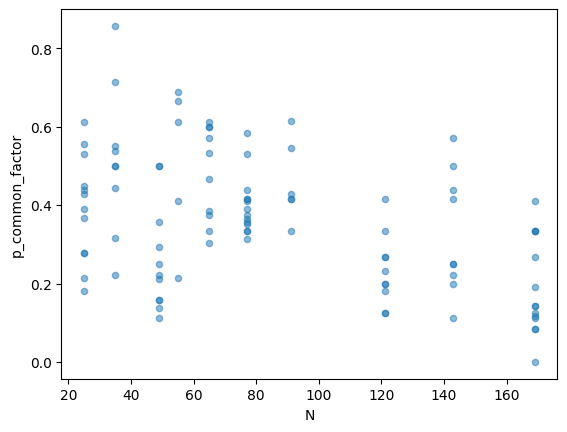

In [73]:
sample_results = pandas.DataFrame(sample_results)
sample_results.plot.scatter(x='N', y='p_common_factor', alpha=0.5)

It looks like, if $a$ and $b$ are found which satisfy the congruence, there's some chance that $a+b$, $a-b$, or $b-a$ will share a factor with $N$.

However, it's presumably not easy to find such $a$ and $b$.